In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import seaborn as sns
import FinancialMachineLearning as fml

In [2]:
from random import gauss
from itertools import product

def main() :
    rPT = rSLm = np.linspace(0, 10, 21)
    count = 0
    for prod_ in product([10, 5, 0, -5, -10], [5, 10, 25, 50, 100]):
        count += 1
        coeffs = {'forecast' : prod_[0], 'hl' : prod_[1], 'sigma' : 1}
        output = fml.Batch(coeffs, nIter = 1e5, maxHP = 100, rPT = rPT, rSLm = rSLm)
    return output

### Chapter 13. Synthetic Data Backtest

#### Exercise 1
당신이 거래 실행 트레이더라고 가정해 보자. 고객이 전화를 걸어 가격 100에 진입한 매도 포지션을 커버하기 위한 주문을 요청했다. 고객은 두 가지 청산 조건을 제시했다. 즉, 105에서의 이익 실현과 90에서의 손절이다.

**(a)** 고객이 가격은 O-U프로세스를 따른다고 믿는다고 가정하면 이 수준이 적절한가? 어떤 파라미터에서 적절한가?


적절하다. 105에서의 이익실현과 90에서의 손절은 예측값 -5와 모든 H-L값 및 H-L값이 25와 100사이인 예측값 -10에 대해 잘 작동한다

**(b)** 이 수준이 적절하게 되는 다른 대체 확률 프로세스를 생각할 수 있겠는가?

#### Exercise 2

주어진 Parameter들에 대해 E-mini S&P 500 선물의 달러 바의 시계열을 O-U프로세스에 적합화하라

**(a)** 다양한 이익 실현과 손절 레벨에 대해 히트맵을 작성하라

In [80]:
df = pd.read_parquet('./Data/IVE_tickbidask.parq')
mad = fml.madOutlier(df.price.values.reshape(-1, 1))
df = df.loc[~mad]
dollar_M = 1000000
dollar_df = fml.BarSampling(df, 'dv', dollar_M)
dollar_df

86.96
[36.17 36.25 36.21 ... 29.26 29.26 29.26]
[1.41225268 1.41537627 1.41381447 ... 1.14245268 1.14245268 1.14245268]


,price,bid,ask,size,v,dv
dates,,,,,,
2009-09-28 09:46:35,51.07,51.05,51.07,900,900,45963.00
2009-09-28 09:53:49,51.14,51.13,51.14,2000,2000,102280.00
2009-09-28 09:55:26,51.14,51.11,51.14,100,100,5114.00
2009-09-28 10:02:52,51.25,51.24,51.26,4300,4300,220375.00
2009-09-28 10:10:21,51.29,51.28,51.29,4500,4500,230805.00
...,...,...,...,...,...,...
2018-10-05 15:58:23,116.19,116.19,116.20,1354,1354,157321.26
2018-10-05 15:59:20,116.18,116.17,116.19,300,300,34854.00
2018-10-05 15:59:55,116.19,116.18,116.20,800,800,92952.00


In [81]:
dollar_df

,price,bid,ask,size,v,dv
dates,,,,,,
2009-09-28 09:46:35,51.07,51.05,51.07,900,900,45963.00
2009-09-28 09:53:49,51.14,51.13,51.14,2000,2000,102280.00
2009-09-28 09:55:26,51.14,51.11,51.14,100,100,5114.00
2009-09-28 10:02:52,51.25,51.24,51.26,4300,4300,220375.00
2009-09-28 10:10:21,51.29,51.28,51.29,4500,4500,230805.00
...,...,...,...,...,...,...
2018-10-05 15:58:23,116.19,116.19,116.20,1354,1354,157321.26
2018-10-05 15:59:20,116.18,116.17,116.19,300,300,34854.00
2018-10-05 15:59:55,116.19,116.18,116.20,800,800,92952.00


In [82]:
dollar_ret = np.log(dollar_df.price) - np.log(dollar_df.price.shift(1))
dollar_ret = dollar_ret.dropna()
dollar_ret

dates
2009-09-28 09:53:49    0.001370
2009-09-28 09:55:26    0.000000
2009-09-28 10:02:52    0.002149
2009-09-28 10:10:21    0.000780
2009-09-28 10:19:36   -0.001171
                         ...   
2018-10-05 15:58:23   -0.000430
2018-10-05 15:59:20   -0.000086
2018-10-05 15:59:55    0.000086
2018-10-05 15:59:59    0.000086
2018-10-05 16:00:00    0.000172
Name: price, Length: 50765, dtype: float64

In [9]:
def genHeatmap(forecast, hl, sigma=1):
    rPT = rSLm = np.linspace(0, 10, 21)
    coeffs = {'forecast': forecast, 'hl': hl, 'sigma': sigma}
    output = fml.Batch(coeffs, nIter=1e5, maxHP=100, rPT=rPT, rSLm=rSLm)
    return output

def OUHeatmap(coeffs, outputs):
    heatdf = pd.DataFrame(outputs)
    heatdfp = heatdf.pivot(1, 0, 4)
    plt.subplots() # give us a new figure
    return sns.heatmap(heatdfp.sort_index(ascending=False))

In [42]:
from typing import Optional
import numpy as np
import brownian_motion
from dataclasses import dataclass

@dataclass
class OUParams:
    phi: float  # mean reversion parameter
    gamma: float  # asymptotic mean
    sigma: float  # Brownian motion scale (standard deviation)

def getOUProcess(T: int, OU_params: OUParams, X_0: Optional[float] = None, random_state: Optional[int] = None, ) -> np.ndarray:
    """
    - T is the sample size.
    - Ou_params is an instance of OUParams dataclass.
    - X_0 the initial value for the process, if None, then X_0 is taken
        to be gamma (the asymptotic mean).
    Returns a 1D array.
    """
    t = np.arange(T, dtype = np.float128) # float to avoid np.exp overflow
    exp_alpha_t = np.exp(-OU_params.phi * t)
    dW = brownian_motion.get_dW(T, random_state)
    integral_W = getIntegalW(t, dW, OU_params)
    _X_0 = selectX0(X_0, OU_params)
    return (
        _X_0 * exp_alpha_t
        + OU_params.gamma * (1 - exp_alpha_t)
        + OU_params.sigma * exp_alpha_t * integral_W
    )


def selectX0(X_0_in: Optional[float], OU_params: OUParams) -> float:
    """Returns X_0 input if not none, else gamma (the long term mean)."""
    if X_0_in is not None:
        return X_0_in
    return OU_params.gamma


def getIntegalW(t: np.ndarray, dW: np.ndarray, OU_params: OUParams) -> np.ndarray:
    """Integral with respect to Brownian Motion (W), ∫...dW."""
    exp_phi_s = np.exp(OU_params.phi * t)
    integral_W = np.cumsum(exp_phi_s * dW)
    return np.insert(integral_W, 0, 0)[:-1]

In [43]:
from sklearn.linear_model import LinearRegression

def estimateOUParams(X_t: np.ndarray) -> OUParams:
    """
    Estimate OU params from OLS regression.
    - X_t is a 1D array.
    Returns instance of OUParams.
    """
    y = np.diff(X_t)
    X = X_t[:-1].reshape(-1, 1)
    reg = LinearRegression(fit_intercept=True)
    reg.fit(X, y)
    # regression coeficient and constant
    phi = -reg.coef_[0]
    gamma = reg.intercept_ / phi
    # residuals and their standard deviation
    y_hat = reg.predict(X)
    sigma = np.std(y - y_hat)
    return OUParams(phi, gamma, sigma)

In [84]:
estimateOUParams(dollar_ret.values)

OUParams(phi=1.12314058322549, gamma=1.617384926362321e-05, sigma=0.0027764282205618575)

$$\Delta X_t = \alpha \gamma \Delta t - \alpha X_t \Delta t + \beta \epsilon_t$$

$$P_{i,t} = (1-\phi)E_0[P_{i,T_i}] + \phi P_{i,t-1} + \sigma \epsilon_{i,t}$$

즉, beta = sigma, alpha = phi에 대응되는 것을 알 수 있다

In [101]:
test = pd.Series(np.nan_to_num(OU_proc)).replace([np.inf, -np.inf], np.nan).fillna(0)

In [111]:
test[test>1000] = 0

In [117]:
test[test<-1000] = 0

In [119]:
# generate process with random_state to reproduce results
OU_params = OUParams(phi = 1.12314058322549, # alpha : t기의 가격 변동은 t기의 가격에 얼마만큼 영향을 미치는가?
                     gamma = 1.617384926362321e-05, # mean
                     sigma = 0.0027764282205618575) # coefficient of error term
OU_proc = getOUProcess(100_000, OU_params)

test = np.array(pd.Series(np.nan_to_num(OU_proc)).replace([np.inf, -np.inf], np.nan).fillna(0).values)
test[test<-1000] = 0
test[test>1000] = 0

OU_params_hat = estimateOUParams(test)

In [120]:
OU_params_hat # prediction

OUParams(phi=0.6650503127281304, gamma=1.82109979095872e-06, sigma=0.0002861079166513548039)

(array([-0.004, -0.002,  0.   ,  0.002,  0.004,  0.006]),
 [Text(0, -0.004, '−0.004'),
  Text(0, -0.002, '−0.002'),
  Text(0, 0.0, '0.000'),
  Text(0, 0.002, '0.002'),
  Text(0, 0.004, '0.004'),
  Text(0, 0.006, '0.006')])

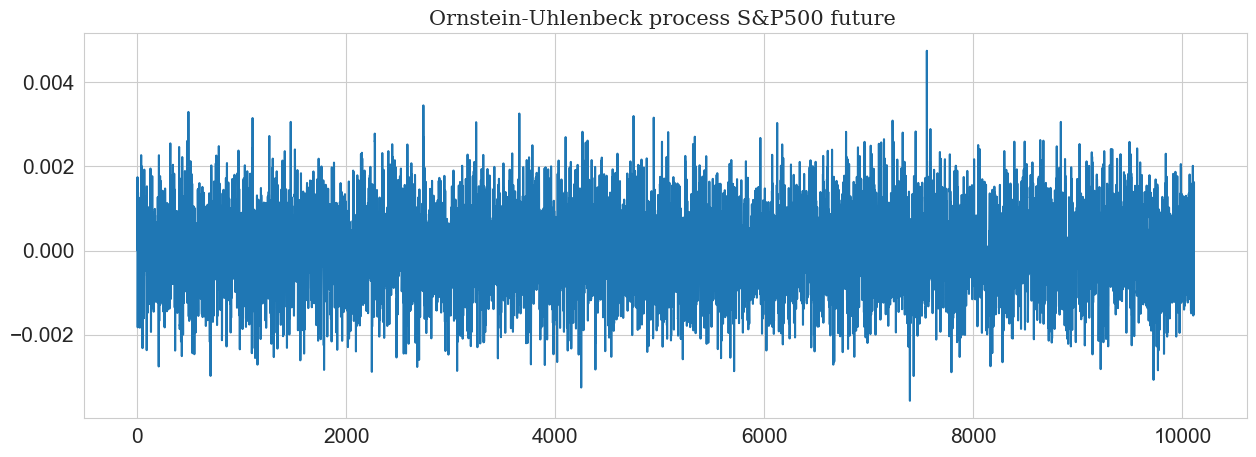

In [121]:
fig = plt.figure(figsize = (15, 5))

title = "Ornstein-Uhlenbeck process S&P500 future "
plt.plot(OU_proc)
plt.gca().set_title(title, fontsize = 15, fontfamily = 'Serif')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

In [ ]:
def OUcoeff() :
    rPT = rSLm = np.linspace(0, 10, 21)
    count = 0
    for prod_ in product([10, 5, 0, -5, -10], [5, 10, 25, 50, 100]):
        count += 1
        coeffs = {'forecast' : prod_[0], 'hl' : prod_[1], 'sigma' : 1}
        output = fml.Batch(coeffs, nIter = 1e5, maxHP = 100, rPT = rPT, rSLm = rSLm)
    return output

In [4]:
runs = range(1,7)
rPT = rSLm = np.linspace(0, 10, 21)
coeffs_list = [{'forecast': x, 'hl': x, 'sigma': 1} for x in runs]

ret = fml.mpPandasObj(fml.processBatch, ('coeffs_list', coeffs_list), numThreads = 6, linMols = True, nIter = 1e4, maxHP = 100, rPT = rPT, rSLm = rSLm)

0.0 0.0 -11.721675258222437 1.0042169106363712 -11.672453564633186
0.0 0.5 -11.719935097108568 1.0109483452008818 -11.593010812812343
0.0 1.0 -11.699994191846756 0.9888669657052569 -11.831717104132764
0.0 1.5 -11.720567271279329 0.9990845861283671 -11.731306271772883
0.0 2.0 -11.711202481574752 0.9792933311481221 -11.958830014541766
0.0 2.5 -11.729523083042615 0.9941599309089587 -11.798426710195745
0.0 3.0 -11.727974767010691 0.9948232099829242 -11.78900396504822
0.0 3.5 -11.719982864912502 0.9858269018864816 -11.888479450586209
0.0 4.0 -11.709047870089858 1.0094965459114968 -11.59889839892171
0.0 4.5 -11.718533073470288 1.0023317273131314 -11.691272214721968
0.0 5.0 -11.700984799734732 1.0058176919838206 -11.633305809779841
0.0 5.5 -11.719750187056166 0.9894425345192279 -11.844801267565089
0.0 6.0 -11.724084512106021 1.0001490132963695 -11.722337727920028
0.0 6.5 -11.71093753013403 0.9983536629613607 -11.730249474316075
0.0 7.0 -11.721031135634345 1.0042741247978646 -11.67114719598446

 1.0023792442581196 -8.015631084063603
3.0 0.5 -8.039039755241172 0.9958788822739634 -8.072306681395876
3.0 1.0 -8.04718430028152 0.9903419987256762 -8.12566195378591
3.0 1.5 -8.042360133075167 1.0123163397584076 -7.944512814042398
3.0 2.0 -8.053689097490714 0.9924625628441683 -8.114854301819408
3.0 2.5 -8.044020299808588 1.0042035233819426 -8.01034861212003
3.0 3.0 -8.052604433258022 0.9985645802438606 -8.064179916427124
3.0 3.5 -8.054967670162421 1.0039141170483412 -8.023562507363916
3.0 4.0 -8.049328262884082 0.996986119867483 -8.073661310303878
3.0 4.5 -8.05175344424935 1.000430575750555 -8.04828804658301
3.0 5.0 -8.060664832865708 0.9979133056248607 -8.077520148725128
3.0 5.5 -8.089304959921837 1.04354559559378 -7.751750373033774
3.0 6.0 -8.192083207116465 1.1387935040764752 -7.193651156062732
3.0 6.5 -8.460575106373916 1.4480335208261659 -5.842803349985152
3.0 7.0 -9.030347643594126 1.9256965190928244 -4.689392930848849
3.0 7.5 -10.020315515378211 2.4219828805501074 -4.1372363099

0.0 0.0 -3.9332828205567507 1.0026654714829406 -3.922826638020587
0.0 0.5 -3.9247159770088134 1.002177434946839 -3.9161887308079346
0.0 1.0 -3.933991744525075 1.0020584012543254 -3.9259106451287726
0.0 1.5 -3.9590746257763385 0.9907900609496851 -3.995876403908931
0.0 2.0 -4.030786334901333 0.9673175926848507 -4.166973045237017
0.0 2.5 -4.22165789101546 0.9951677886376148 -4.242156889739078
0.0 3.0 -4.585612433221145 1.1145224175203445 -4.114419199771223
0.0 3.5 -5.155721615904563 1.2592323829451926 -4.094336903761919
0.0 4.0 -5.830359215663788 1.3493213984909356 -4.3209566098813745
0.0 4.5 -6.4945784913759 1.308803424510778 -4.962226083572122
0.0 5.0 -7.07136082452799 1.2231765394751466 -5.781144909435758
0.0 5.5 -7.4944108751157765 1.146633139933727 -6.536014540403862
0.0 6.0 -7.853500666677851 1.1152544651424314 -7.041891256337507
0.0 6.5 -8.225964333208546 1.1068111445036195 -7.432130019704229
0.0 7.0 -8.683560181553784 1.13393163289595 -7.657922161829831
0.0 7.5 -9.198583288804622 


3.0 0.0 -6.03007779837532 1.0028074792755706 -6.013195875574698
3.0 0.5 -6.057138858675181 0.9992223383805573 -6.0618529290408025
3.0 1.0 -6.0437103645796215 1.0050385411170568 -6.0134115432650965
3.0 1.5 -6.052450725806733 0.9992509417716697 -6.056987762329001
3.0 2.0 -6.049436463803958 0.9992481981192755 -6.053987863265444
3.0 2.5 -6.052643299578849 0.9998057876977966 -6.053819025708954
3.0 3.0 -6.048517502629043 0.9936626308532601 -6.087093662197167
3.0 3.5 -6.059994882549063 0.9976092820692443 -6.074517340074666
3.0 4.0 -6.160570541243047 1.0421928708842618 -5.911161660524536
3.0 4.5 -6.387102509309972 1.2183020863266207 -5.24262625911454
3.0 5.0 -6.822926576593029 1.4914782393928345 -4.574606854050095
3.0 5.5 -7.583886847733377 1.85198539381884 -4.095003596165094
3.0 6.0 -8.560845535786994 2.0133841958143703 -4.251968180531146
3.0 6.5 -9.547914997818497 1.9287461500055265 -4.950322258733291
3.0 7.0 -10.295964962298664 1.6808406732358743 -6.12548537540882
3.0 7.5 -10.7998509398646


3.0 0.0 -3.917899505996665 0.9967207364994589 -3.9307896008630814
3.0 0.5 -3.9164848643872743 1.006562777626905 -3.8909494285302966
3.0 1.0 -3.9435212796253603 0.9877632320472217 -3.9923750466516994
3.0 1.5 -3.9520805907233765 0.9796114798736947 -4.034334705053614
3.0 2.0 -4.030216083455082 0.9642179631890382 -4.1797770185961
3.0 2.5 -4.215512968149161 0.9934543089324035 -4.243288221960888
3.0 3.0 -4.55611390136614 1.0861880886661308 -4.194590190140249
3.0 3.5 -5.149640818511334 1.2797867746212452 -4.023827187959008
3.0 4.0 -5.841854114238225 1.3479028499829586 -4.334032021901343
3.0 4.5 -6.539514024830079 1.3233280180662284 -4.941718104318711
3.0 5.0 -7.0560955333004864 1.2283583823610282 -5.744329696141253
3.0 5.5 -7.502035099542534 1.1512833934696416 -6.516236699057673
3.0 6.0 -7.870565875677595 1.1136327146212153 -7.067470066515283
3.0 6.5 -8.20534989887648 1.105828422191898 -7.420093148458234
3.0 7.0 -8.682924811083925 1.1242773759484366 -7.723116196089101
3.0 7.5 -9.196060775434

2023-06-06 13:37:19.838794 100.0% processBatch done after 0.25 minutes. Remaining 0.0 minutes..


5.5 8.0 -11.715998137922568 0.9956598184224961 -11.767069355560784
5.5 8.5 -11.724289070381865 0.9897260612413158 -11.845994088179557
5.5 9.0 -11.753256698656479 1.0554799367479584 -11.135461972749065
5.5 9.5 -11.832154887153662 1.2137594788494077 -9.748352201022595
5.5 10.0 -12.081349654851463 1.590748989939851 -7.5947555090437495
6.0 0.0 -11.691380414125177 1.001532174089162 -11.673494588187184
6.0 0.5 -11.73193003468628 1.0014972793464143 -11.714390320004302
6.0 1.0 -11.714397969452712 0.994128023466811 -11.783590938922766
6.0 1.5 -11.711369987848517 0.9994556565049139 -11.71774846800413
6.0 2.0 -11.706047329658928 0.9975462547496798 -11.734841641600264
6.0 2.5 -11.723476872717933 0.9990710465079822 -11.734377563732417
6.0 3.0 -11.716862080405008 0.9984858544446635 -11.734630018290721
6.0 3.5 -11.727981131982306 1.0058255931490978 -11.66005439895763
6.0 4.0 -11.698069855171372 0.9901840266285411 -11.814036119126168
6.0 4.5 -11.731340233970766 1.004912652375163 -11.67398997937098
6.0

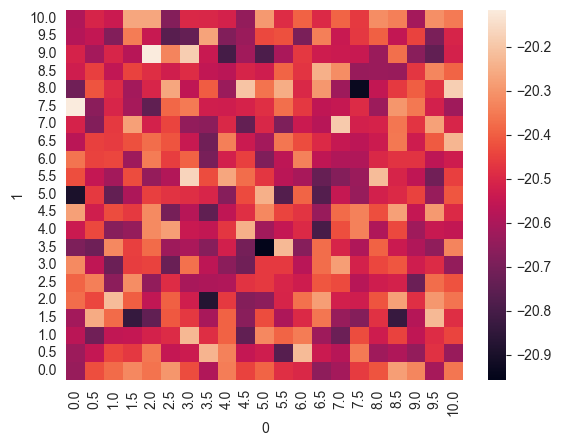

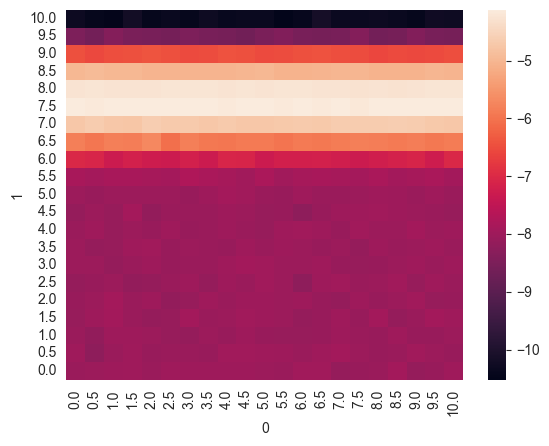

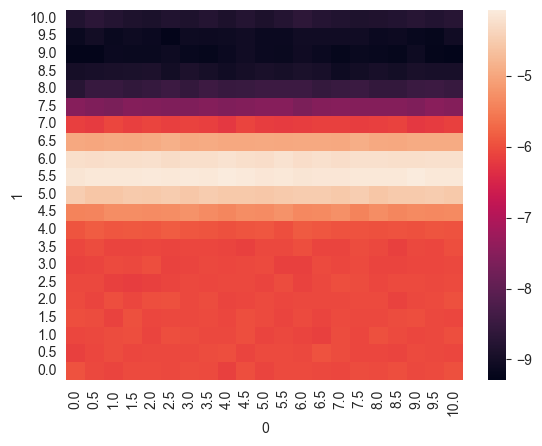

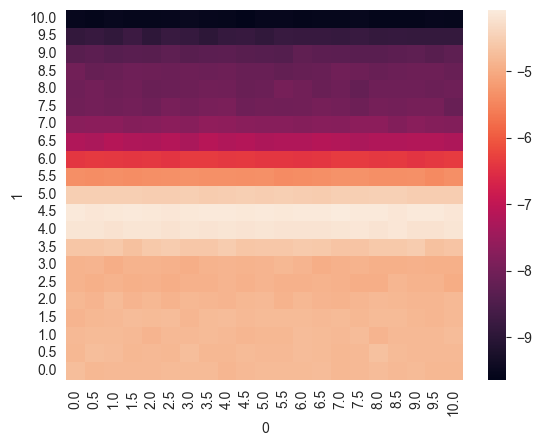

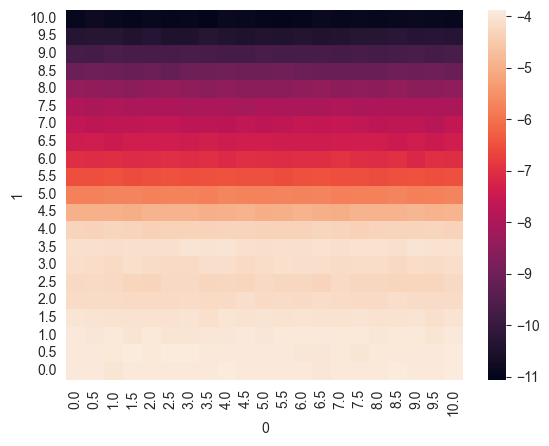

In [10]:
for coeffs, outputs in [x[0] for x in ret[1:]]:
    ax = OUHeatmap(coeffs, outputs)

**(b)** OTR은 무엇인가?